In [1]:
from tensorflow import keras

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

from pathlib import Path

2024-10-13 14:25:08.552816: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-13 14:25:08.562021: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-13 14:25:08.573417: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-13 14:25:08.576318: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-13 14:25:08.583865: I tensorflow/core/platform/cpu_feature_guar

In [2]:
X_data = pd.read_csv('data/x_data.csv', index_col=0)
X_data.head()

0  1  2  3  4  5  6  7  8  9  ...  157  158  159  160  161  162  163  164  \
0  0  0  0  0  0  0  0  0  0  0  ...    0    1    1    1    1    1    1    1   
1  0  0  0  0  0  0  0  0  0  0  ...    0    1    1    1    1    1    1    1   
2  0  0  0  0  0  0  0  0  0  0  ...    0    1    1    0    1    1    1    1   
3  0  0  0  0  0  0  0  0  0  0  ...    1    1    1    1    1    1    1    1   
4  0  0  0  0  0  0  0  0  0  0  ...    0    1    1    1    1    1    1    1   

   165  166  
0    1    0  
1    1    0  
2    1    0  
3    1    0  
4    1    0  

[5 rows x 167 columns]

In [3]:
X_data.shape

(2943, 167)

In [4]:
y_data = pd.read_csv('data/y_data.csv', index_col=0)
y_data.head()

pKi      fsp3  n_lipinski_hba  n_lipinski_hbd  n_rings  n_hetero_atoms  \
0  7.24  0.260870               9               1        5               9   
1  7.38  0.222222               9               1        6               9   
2  7.22  0.148148               9               1        6               9   
3  7.42  0.260870              10               1        5              10   
4  6.37  0.105263               9               1        5               9   

   n_heavy_atoms  n_rotatable_bonds    tpsa       qed  ...       sas  \
0             32                  7  103.14  0.420000  ...  2.785385   
1             36                  7  103.14  0.341105  ...  2.869417   
2             36                  8  103.14  0.345039  ...  2.702531   
3             33                  8  112.37  0.386515  ...  2.792537   
4             28                  4  103.14  0.518988  ...  2.681130   

   n_aliphatic_carbocycles  n_aliphatic_heterocyles  n_aliphatic_rings  \
0                        0                        0                  0   
1                        0                        0                  0   
2                        0                        0                  0   
3                        0                        0                  0   
4                        0                        0                  0   

   n_aromatic_carbocycles  n_aromatic_heterocyles  n_aromatic_rings  \
0                       1                       4                 5   
1                       2                       4                 6   
2                       2                       4                 6   
3                       1                       4                 5   
4                       1                       4                 5   

   n_saturated_carbocycles  n_saturated_heterocyles  n_saturated_rings  
0                        0                        0                  0  
1                        0                        0                  0  
2                        0                        0                  0  
3                        0                        0                  0  
4                        0                        0                  0  

[5 rows x 21 columns]

In [5]:
'n_radical_electrons' in y_data.columns

False

In [6]:
len(y_data.columns)

21

In [7]:
y_data.shape

(2943, 21)

In [8]:
cwd = Path.cwd()
cwd

PosixPath('/home/asasa/EPAM/Adora')

In [9]:
X_1, X_test, y_1, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

In [11]:
X_train.shape, X_val.shape, X_test.shape

((1883, 167), (471, 167), (589, 167))

In [12]:
y_train.shape, y_val.shape, y_test.shape

((1883, 21), (471, 21), (589, 21))

In [13]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train.to_numpy(), y_train.to_numpy()))

I0000 00:00:1728822310.753254  569389 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728822310.769031  569389 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728822310.769073  569389 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728822310.771398  569389 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728822310.771452  569389 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

In [14]:
train_dataset = train_dataset.batch(32)

In [15]:
m = 0
for x, y in train_dataset:
    print(x)
    print(y)
    m +=1 
    if m == 2:
        break


tf.Tensor(
[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 1 1 0]], shape=(32, 167), dtype=int64)
tf.Tensor(
[[5.20000000e+00 3.75000000e-01 6.00000000e+00 1.00000000e+00
  4.00000000e+00 6.00000000e+00 2.20000000e+01 3.00000000e+00
  6.85200000e+01 8.04139641e-01 2.77980000e+00 2.43599886e+00
  1.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  3.00000000e+00 3.00000000e+00 1.00000000e+00 0.00000000e+00
  1.00000000e+00]
 [6.52000000e+00 3.12500000e-01 5.00000000e+00 1.00000000e+00
  4.00000000e+00 5.00000000e+00 2.10000000e+01 3.00000000e+00
  5.56300000e+01 8.00458287e-01 2.99470000e+00 2.24341638e+00
  1.00000000e+00 0.00000000e+00 1.00000000e+00 1.00000000e+00
  2.00000000e+00 3.00000000e+00 1.00000000e+00 0.00000000e+00
  1.00000000e+00]
 [6.17000000e+00 0.00000000e+00 5.00000000e+00 2.00000000e+00
  3.00000000e+00 5.00000000e+00 2.10000000e+01 2.00000000e+00
  8.84800000e+01 7.74970957e-01 2.65948000e+00 

In [16]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(32)

In [17]:
for x, y in val_dataset:
    print(x)
    print(y)
    break

tf.Tensor(
[[0 0 0 ... 1 1 0]
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 1 1 0]
 ...
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 1 1 0]], shape=(32, 167), dtype=int64)
tf.Tensor(
[[8.73000000e+00 2.60869565e-01 9.00000000e+00 1.00000000e+00
  5.00000000e+00 1.00000000e+01 3.30000000e+01 7.00000000e+00
  1.03140000e+02 3.77609861e-01 4.61470000e+00 2.87390145e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  4.00000000e+00 5.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [6.22000000e+00 2.85714286e-01 1.00000000e+01 3.00000000e+00
  4.00000000e+00 1.00000000e+01 2.40000000e+01 5.00000000e+00
  1.26530000e+02 4.68167977e-01 3.61000000e-02 3.12399401e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  4.00000000e+00 4.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [8.11000000e+00 0.00000000e+00 6.00000000e+00 2.00000000e+00
  4.00000000e+00 7.00000000e+00 2.30000000e+01 2.00000000e+00
  1.01620000e+02 6.06733880e-01 3.46718000e+00 

In [18]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

In [19]:
for x, y in test_dataset:
    print(x)
    print(y)
    break

tf.Tensor(
[[0 0 0 ... 0 1 0]
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 1 1 0]
 ...
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 1 1 0]], shape=(32, 167), dtype=int64)
tf.Tensor(
[[8.64000000e+00 1.81818182e-01 4.00000000e+00 0.00000000e+00
  3.00000000e+00 6.00000000e+00 1.70000000e+01 2.00000000e+00
  4.19100000e+01 7.11889556e-01 2.88080000e+00 2.83462388e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  3.00000000e+00 3.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [4.00000000e+00 4.50000000e-01 1.00000000e+01 1.00000000e+00
  4.00000000e+00 1.00000000e+01 3.00000000e+01 6.00000000e+00
  1.03610000e+02 6.19449939e-01 3.46900000e-01 2.47858824e+00
  0.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  2.00000000e+00 3.00000000e+00 0.00000000e+00 1.00000000e+00
  1.00000000e+00]
 [8.52000000e+00 3.04347826e-01 8.00000000e+00 0.00000000e+00
  5.00000000e+00 8.00000000e+00 3.10000000e+01 4.00000000e+00
  8.84500000e+01 5.12195499e-01 3.01068000e+00 

In [20]:
y_data.shape[1]

21

In [21]:
model = keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(y_data.shape[1])
])

In [22]:
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
callbacks = keras.callbacks.ModelCheckpoint(
    'data/adora.keras', save_best_only=True
)

In [25]:
history = model.fit(
    train_dataset,
    epochs=1000,
    batch_size=32,
    validation_data=val_dataset,
    callbacks=[callbacks]
)

Epoch 1/1000


I0000 00:00:1728822311.898641  569503 service.cc:146] XLA service 0x7fee2c002560 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728822311.898688  569503 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-10-13 14:25:11.913107: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-13 14:25:11.969377: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


42/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 397.0367 - mae: 7.3887 

I0000 00:00:1728822312.867326  569503 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 349.1410 - mae: 6.9082 - val_loss: 19.5171 - val_mae: 1.9192
Epoch 2/1000
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.7465 - mae: 1.6048 - val_loss: 11.3366 - val_mae: 1.3745
Epoch 3/1000
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.1570 - mae: 1.3841 - val_loss: 9.0724 - val_mae: 1.2968
Epoch 4/1000
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.9781 - mae: 1.3098 - val_loss: 7.9642 - val_mae: 1.2907
Epoch 5/1000
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.7921 - mae: 1.2731 - val_loss: 7.2137 - val_mae: 1.2323
Epoch 6/1000
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.9870 - mae: 1.2207 - val_loss: 6.6151 - val_mae: 1.1768
Epoch 7/1000
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.4131 - mae: 1.1792 - val_loss: 6.1924 - val_mae: 1.1447
Epoch 8/1000
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.9857 - mae: 1.1407 - val_loss: 5.7923 - val_mae: 1.0781
Epoch 9/1000
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.

(0.0, 5.0)

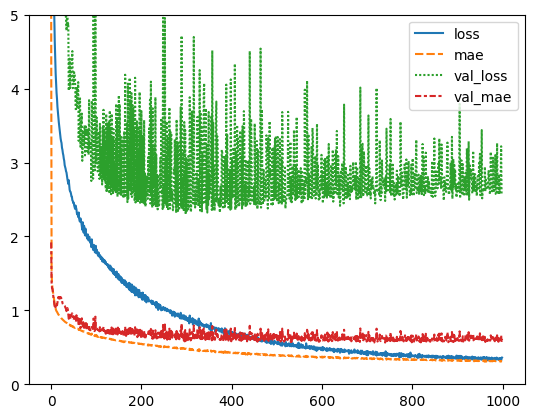

In [26]:
sns.lineplot(history.history)
# plt.xlim(2)
plt.ylim(0, 5)


In [27]:
best_model = keras.models.load_model('data/adora.keras')

In [28]:
best_model.evaluate(val_dataset)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.4477 - mae: 0.5805


[2.3005590438842773, 0.5858350396156311]

In [29]:
y_pred = best_model.predict(val_dataset)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [30]:
accuracy = root_mean_squared_error(y_val, y_pred, multioutput='raw_values')

In [31]:
accuracy

array([0.86685578, 0.30022136, 0.56031602, 0.42376099, 0.42766627,
       0.76011444, 2.21406125, 0.92139268, 6.21102999, 0.14930587,
       0.69633677, 0.28133844, 0.32269279, 0.34740748, 0.36980787,
       0.49702098, 0.43397066, 0.44788765, 0.27929369, 0.25509423,
       0.40136289])

In [32]:
accuracy.shape

(21,)

In [33]:
results_df = pd.read_csv('data/results_tpot.csv', index_col=0)

In [34]:
results_df

descriptors  random_forest        svm      tpot
0                       pKi       0.739326   0.793464  0.729269
1                      fsp3       0.044040   0.064389  0.038060
2            n_lipinski_hba       0.552972   0.504572  0.464021
3            n_lipinski_hbd       0.200272   0.229061  0.191063
4                   n_rings       0.373395   0.372597  0.356783
5            n_hetero_atoms       0.659574   0.589084  0.562944
6             n_heavy_atoms       2.215775   2.597579  2.017585
7         n_rotatable_bonds       0.728725   0.780863  0.664722
8                      tpsa       7.191903  13.543162  6.056467
9                       qed       0.067386   0.078131  0.063815
10                    clogp       0.629227   0.603829  0.577995
11                      sas       0.198629   0.186162  0.179592
12  n_aliphatic_carbocycles       0.177609   0.247976  0.163787
13  n_aliphatic_heterocyles       0.170574   0.203561  0.161709
14        n_aliphatic_rings       0.246688   0.281009  0.210022
15   n_aromatic_carbocycles       0.371633   0.375942  0.343561
16   n_aromatic_heterocyles       0.328145   0.346113  0.312203
17         n_aromatic_rings       0.374655   0.364342  0.347580
18  n_saturated_carbocycles       0.151791   0.229226  0.137560
19  n_saturated_heterocyles       0.136890   0.154529  0.128335
20        n_saturated_rings       0.203361   0.229693  0.177132

In [35]:
len(results_df)

21

In [36]:
results_df['neural'] = accuracy

In [37]:
results_df

descriptors  random_forest        svm      tpot    neural
0                       pKi       0.739326   0.793464  0.729269  0.866856
1                      fsp3       0.044040   0.064389  0.038060  0.300221
2            n_lipinski_hba       0.552972   0.504572  0.464021  0.560316
3            n_lipinski_hbd       0.200272   0.229061  0.191063  0.423761
4                   n_rings       0.373395   0.372597  0.356783  0.427666
5            n_hetero_atoms       0.659574   0.589084  0.562944  0.760114
6             n_heavy_atoms       2.215775   2.597579  2.017585  2.214061
7         n_rotatable_bonds       0.728725   0.780863  0.664722  0.921393
8                      tpsa       7.191903  13.543162  6.056467  6.211030
9                       qed       0.067386   0.078131  0.063815  0.149306
10                    clogp       0.629227   0.603829  0.577995  0.696337
11                      sas       0.198629   0.186162  0.179592  0.281338
12  n_aliphatic_carbocycles       0.177609   0.247976  0.163787  0.322693
13  n_aliphatic_heterocyles       0.170574   0.203561  0.161709  0.347407
14        n_aliphatic_rings       0.246688   0.281009  0.210022  0.369808
15   n_aromatic_carbocycles       0.371633   0.375942  0.343561  0.497021
16   n_aromatic_heterocyles       0.328145   0.346113  0.312203  0.433971
17         n_aromatic_rings       0.374655   0.364342  0.347580  0.447888
18  n_saturated_carbocycles       0.151791   0.229226  0.137560  0.279294
19  n_saturated_heterocyles       0.136890   0.154529  0.128335  0.255094
20        n_saturated_rings       0.203361   0.229693  0.177132  0.401363

In [38]:
# results_df.to_csv('results_neuro.csv')

In [57]:
def get_model():
    model = keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
    ])
    
    model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])
    
    return model

In [58]:
y_train.columns[0]

'pKi'

In [59]:
histories = dict()
best_models = dict()
for i in range(y_data.shape[1]):
    y_tr = y_train.iloc[:, i]
    y_vl = y_val.iloc[:, i]
    name = y_train.columns[i]
    filename = f'clbk/{name}_adora.keras'
    callback = keras.callbacks.ModelCheckpoint(filename, save_best_only=True)
    model = get_model()
    history = model.fit(
        x=X_train, y=y_tr,
        epochs=1000,
        batch_size=32,
        callbacks=[callback],
        validation_data=(X_val, y_vl)
    )
    histories[name] = history
    best_models[name] = keras.models.load_model(filename)

    

Epoch 1/1000
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 7.2385 - mae: 1.9031 - val_loss: 1.1032 - val_mae: 0.8437
Epoch 2/1000
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1067 - mae: 0.8408 - val_loss: 1.0118 - val_mae: 0.8011
Epoch 3/1000
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0263 - mae: 0.7950 - val_loss: 1.1021 - val_mae: 0.8518
Epoch 4/1000
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8870 - mae: 0.7435 - val_loss: 0.8699 - val_mae: 0.7425
Epoch 5/1000
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8252 - mae: 0.7218 - val_loss: 0.8579 - val_mae: 0.7353
Epoch 6/1000
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7945 - mae: 0.7136 - val_loss: 0.8312 - val_mae: 0.7228
Epoch 7/1000
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7667 - mae: 0.6858 - val_loss: 0.7377 - val_mae: 0.6805
Epoch 8/1000
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7403 - mae: 0.6745 - val_loss: 0.7373 - val_mae: 0.6818
Epoch 9/1000
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - l

In [60]:
results_df

descriptors  random_forest        svm      tpot    neural
0                       pKi       0.739326   0.793464  0.729269  0.866856
1                      fsp3       0.044040   0.064389  0.038060  0.300221
2            n_lipinski_hba       0.552972   0.504572  0.464021  0.560316
3            n_lipinski_hbd       0.200272   0.229061  0.191063  0.423761
4                   n_rings       0.373395   0.372597  0.356783  0.427666
5            n_hetero_atoms       0.659574   0.589084  0.562944  0.760114
6             n_heavy_atoms       2.215775   2.597579  2.017585  2.214061
7         n_rotatable_bonds       0.728725   0.780863  0.664722  0.921393
8                      tpsa       7.191903  13.543162  6.056467  6.211030
9                       qed       0.067386   0.078131  0.063815  0.149306
10                    clogp       0.629227   0.603829  0.577995  0.696337
11                      sas       0.198629   0.186162  0.179592  0.281338
12  n_aliphatic_carbocycles       0.177609   0.247976  0.163787  0.322693
13  n_aliphatic_heterocyles       0.170574   0.203561  0.161709  0.347407
14        n_aliphatic_rings       0.246688   0.281009  0.210022  0.369808
15   n_aromatic_carbocycles       0.371633   0.375942  0.343561  0.497021
16   n_aromatic_heterocyles       0.328145   0.346113  0.312203  0.433971
17         n_aromatic_rings       0.374655   0.364342  0.347580  0.447888
18  n_saturated_carbocycles       0.151791   0.229226  0.137560  0.279294
19  n_saturated_heterocyles       0.136890   0.154529  0.128335  0.255094
20        n_saturated_rings       0.203361   0.229693  0.177132  0.401363

In [65]:
best_models

{'pKi': <Sequential name=sequential_33, built=True>,
 'fsp3': <Sequential name=sequential_34, built=True>,
 'n_lipinski_hba': <Sequential name=sequential_35, built=True>,
 'n_lipinski_hbd': <Sequential name=sequential_36, built=True>,
 'n_rings': <Sequential name=sequential_37, built=True>,
 'n_hetero_atoms': <Sequential name=sequential_38, built=True>,
 'n_heavy_atoms': <Sequential name=sequential_39, built=True>,
 'n_rotatable_bonds': <Sequential name=sequential_40, built=True>,
 'tpsa': <Sequential name=sequential_41, built=True>,
 'qed': <Sequential name=sequential_42, built=True>,
 'clogp': <Sequential name=sequential_43, built=True>,
 'sas': <Sequential name=sequential_44, built=True>,
 'n_aliphatic_carbocycles': <Sequential name=sequential_45, built=True>,
 'n_aliphatic_heterocyles': <Sequential name=sequential_46, built=True>,
 'n_aliphatic_rings': <Sequential name=sequential_47, built=True>,
 'n_aromatic_carbocycles': <Sequential name=sequential_48, built=True>,
 'n_aromatic_h

In [75]:
result_ml = []
for descriptor in results_df['descriptors']:
    # print(descriptor)
    y_desc_pred = best_models[descriptor].predict(X_val)
    # print(y_desc_pred.reshape(-1))
    # print(y_val[descriptor].to_list())
    score = root_mean_squared_error(y_val[descriptor].to_list(), y_desc_pred.reshape(-1))
    result_ml.append(score)
    

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [76]:
results_df['neural_all'] = result_ml

In [77]:
results_df

descriptors  random_forest        svm      tpot    neural  \
0                       pKi       0.739326   0.793464  0.729269  0.866856   
1                      fsp3       0.044040   0.064389  0.038060  0.300221   
2            n_lipinski_hba       0.552972   0.504572  0.464021  0.560316   
3            n_lipinski_hbd       0.200272   0.229061  0.191063  0.423761   
4                   n_rings       0.373395   0.372597  0.356783  0.427666   
5            n_hetero_atoms       0.659574   0.589084  0.562944  0.760114   
6             n_heavy_atoms       2.215775   2.597579  2.017585  2.214061   
7         n_rotatable_bonds       0.728725   0.780863  0.664722  0.921393   
8                      tpsa       7.191903  13.543162  6.056467  6.211030   
9                       qed       0.067386   0.078131  0.063815  0.149306   
10                    clogp       0.629227   0.603829  0.577995  0.696337   
11                      sas       0.198629   0.186162  0.179592  0.281338   
12  n_aliphatic_carbocycles       0.177609   0.247976  0.163787  0.322693   
13  n_aliphatic_heterocyles       0.170574   0.203561  0.161709  0.347407   
14        n_aliphatic_rings       0.246688   0.281009  0.210022  0.369808   
15   n_aromatic_carbocycles       0.371633   0.375942  0.343561  0.497021   
16   n_aromatic_heterocyles       0.328145   0.346113  0.312203  0.433971   
17         n_aromatic_rings       0.374655   0.364342  0.347580  0.447888   
18  n_saturated_carbocycles       0.151791   0.229226  0.137560  0.279294   
19  n_saturated_heterocyles       0.136890   0.154529  0.128335  0.255094   
20        n_saturated_rings       0.203361   0.229693  0.177132  0.401363   

    neural_all  
0     0.727112  
1     0.040697  
2     0.453487  
3     0.179188  
4     0.318387  
5     0.538821  
6     1.909867  
7     0.629329  
8     5.915114  
9     0.069509  
10    0.564530  
11    0.167001  
12    0.140992  
13    0.192730  
14    0.196353  
15    0.344437  
16    0.308688  
17    0.334418  
18    0.158184  
19    0.136195  
20    0.148253

(0.0, 1.0)

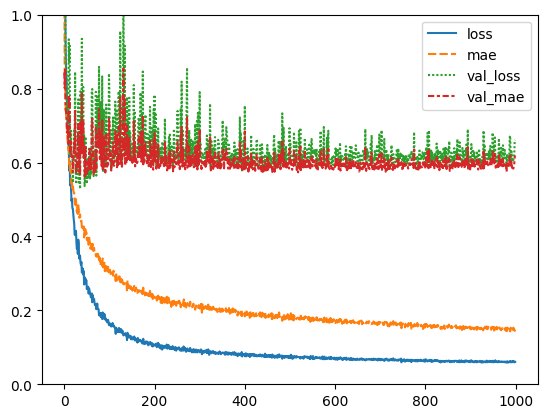

In [84]:
sns.lineplot(histories['pKi'].history)
plt.ylim([0, 1])

(0.0, 0.005)

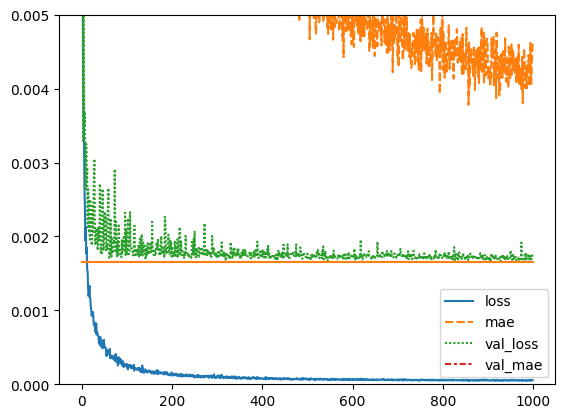

In [204]:
sns.lineplot(histories['fsp3'].history)
sns.lineplot(x=list(range(1000)), y=min(histories['fsp3'].history['val_loss']))
plt.ylim([0, 0.005])

In [88]:
results_df.to_csv('results_neuro_all.csv')

In [167]:
plt.rcParams['figure.max_open_warning'] = 30

In [196]:
def draw(name, fig_no):
    x = best_models[name].predict(X_val).reshape(-1)
    y = y_val[name]
    plt.figure(fig_no)
    sns.scatterplot(x=x, y=y, hue=abs(x-y), palette='viridis')
    coord_0 = min(plt.xlim()[0], plt.ylim()[0])
    coord_1 = max(plt.xlim()[1], plt.ylim()[1])
    # print(coord_0, coord_1)
    sns.lineplot(x=[coord_0, coord_1], y=[coord_0, coord_1], color='k', linestyle='--')
    plt.grid()
    plt.title(name)
    plt.tight_layout()

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step


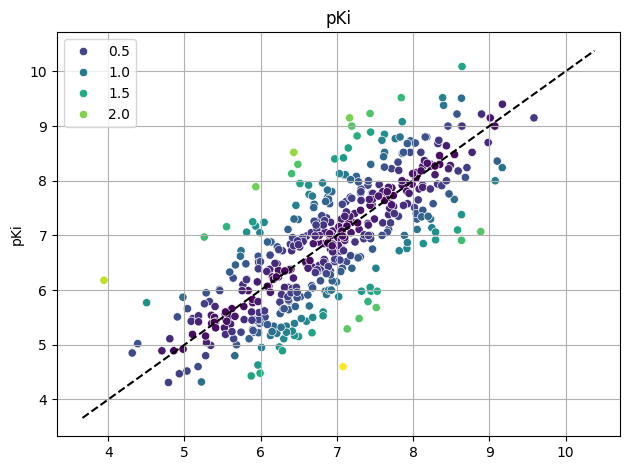

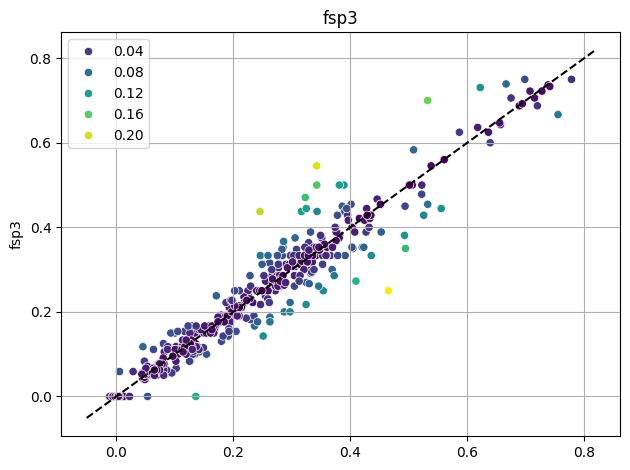

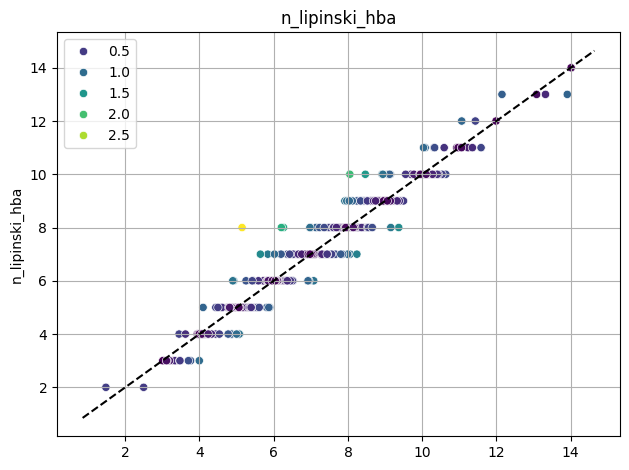

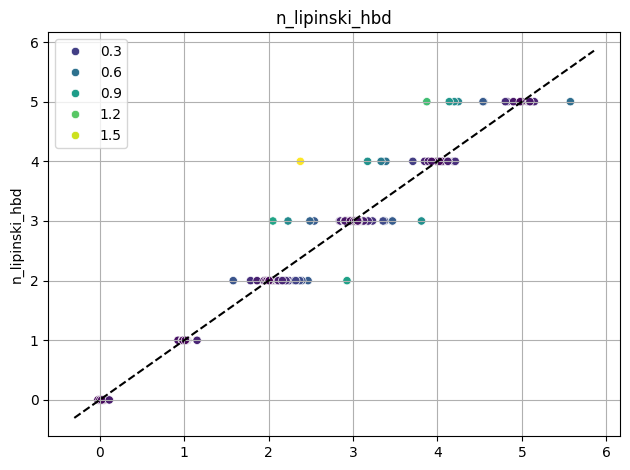

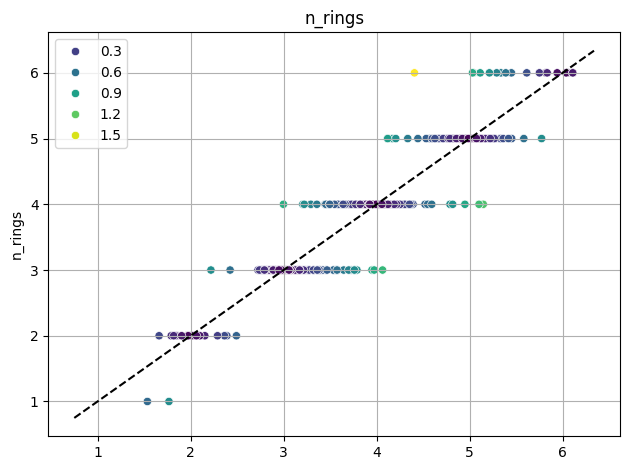

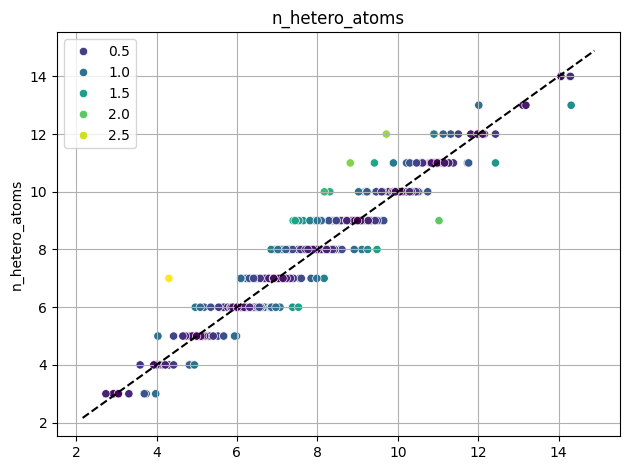

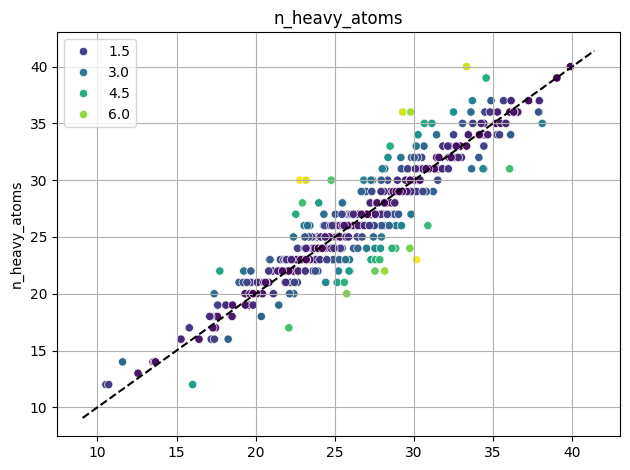

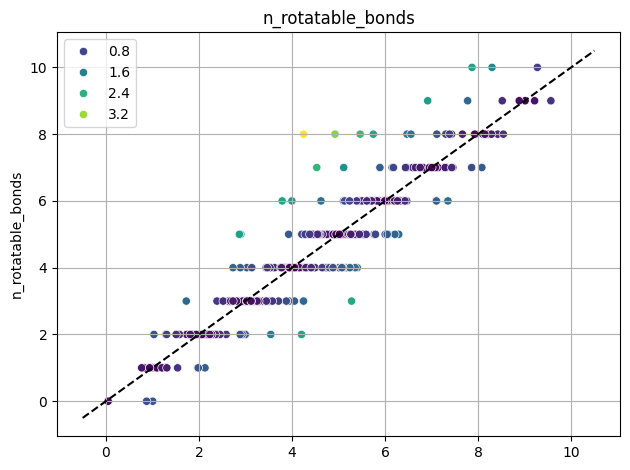

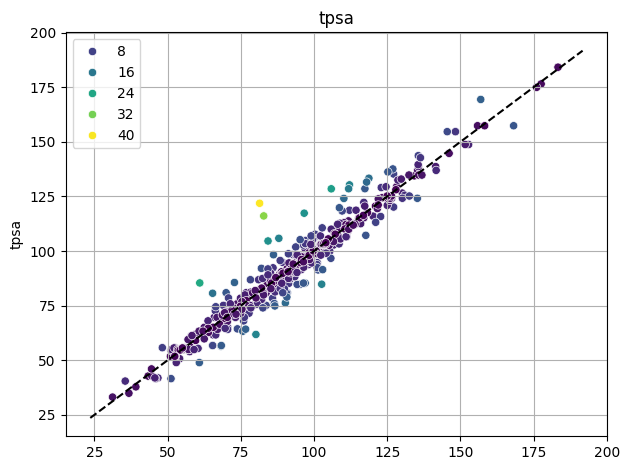

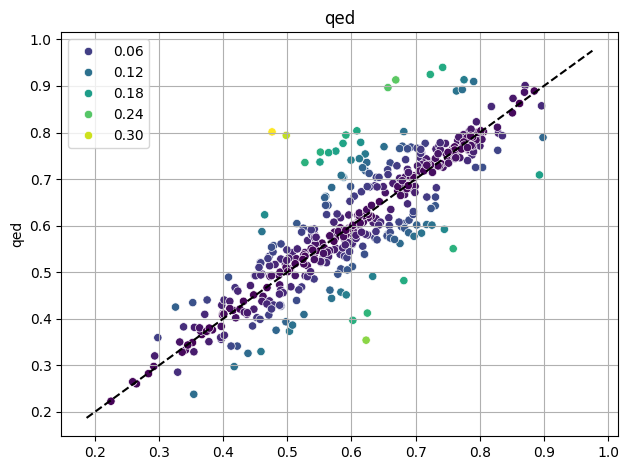

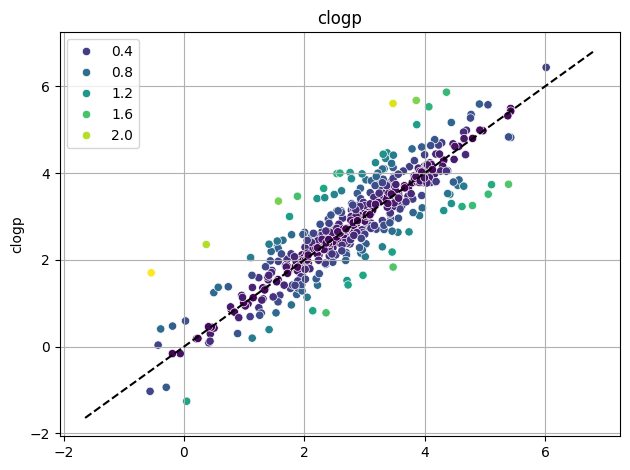

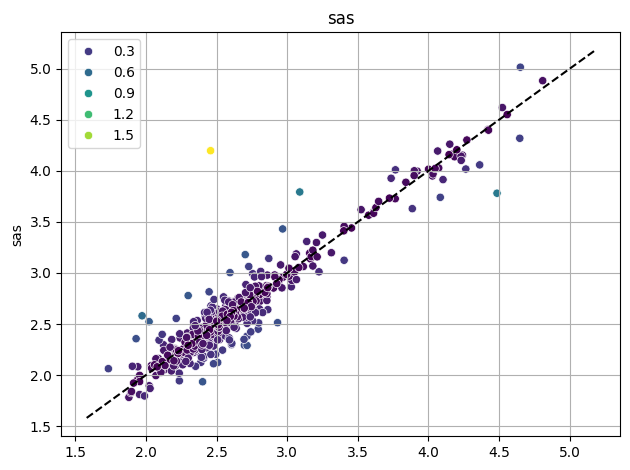

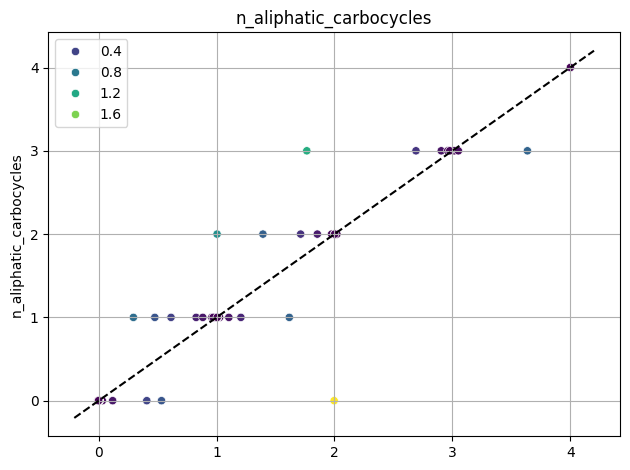

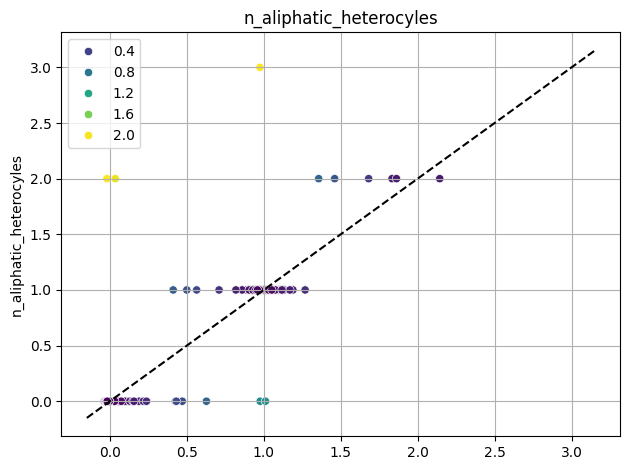

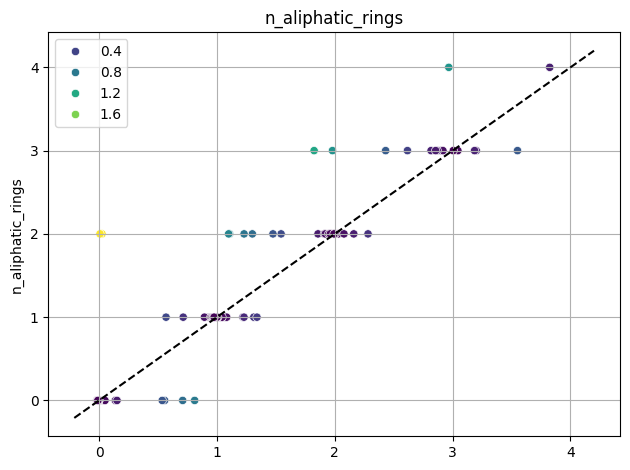

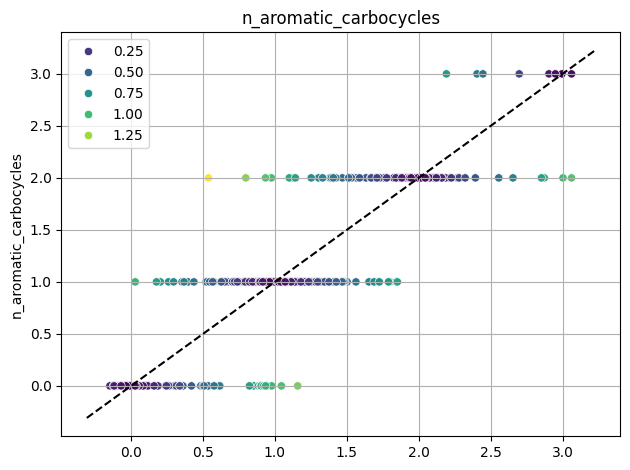

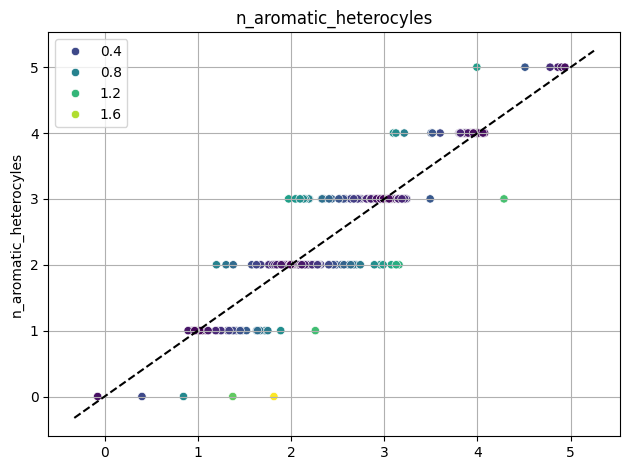

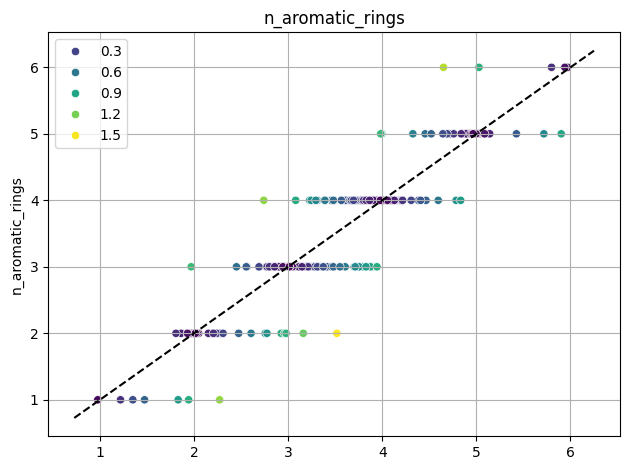

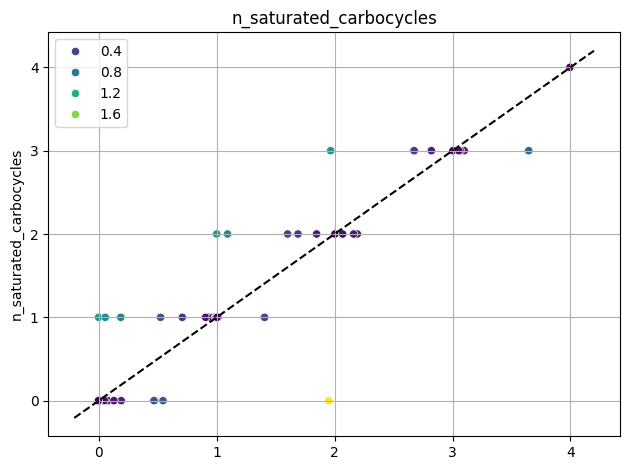

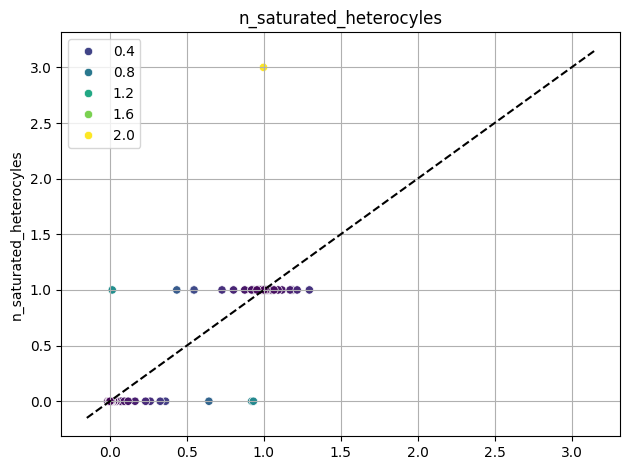

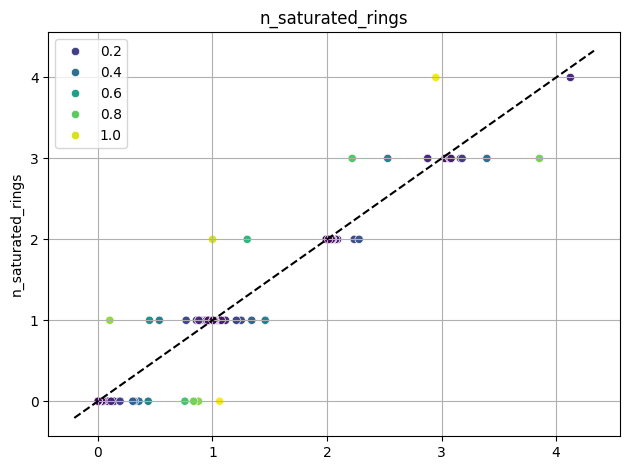

In [197]:
fig = 0
for name in results_df['descriptors']:
    draw(name, fig)
    fig += 1